In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 17 ##

## Distribution of a Statistic vs Distribution of Data ##

In [52]:
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)

def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [54]:
def plot_simulated_medians(num_sample_per_sim, num_simulations):
    sample_medians = make_array()
    for i in np.arange(num_simulations):
        new_median = sample_median(num_sample_per_sim)
        sample_medians = np.append(sample_medians, new_median)
    Table().with_column('Sample medians (size=' + str(num_sample_per_sim) + ')', sample_medians).hist(bins=20)
    print('True median: ' + str(np.median(united.column('Delay'))))

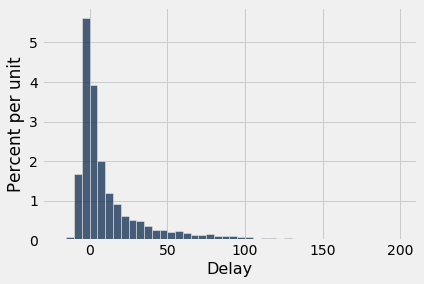

In [29]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

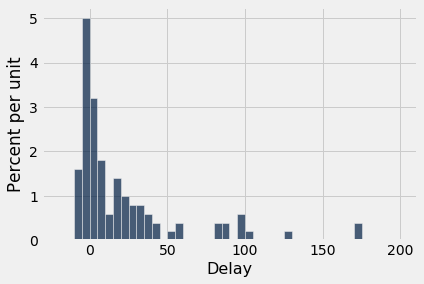

In [33]:
# (Sample - Data) Empirical Distribution
# Try with increasing values of num_sample
num_sample = 100
united.sample(num_sample).hist('Delay', bins = united_bins)

True median: 2.0


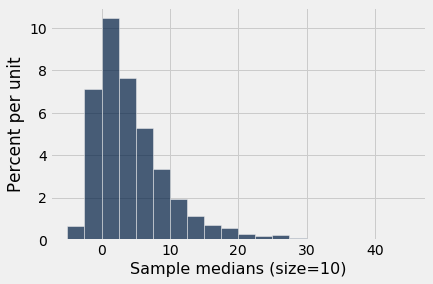

In [55]:
# (Sample - Statistic) Empirical Distribution
# Try with increasing values of num_sample or num_simulations
num_sample_per_sim = 10
num_simulations = 2000

plot_simulated_medians(num_sample_per_sim, num_simulations)

## Alameda County Jury Panels ##

In [15]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


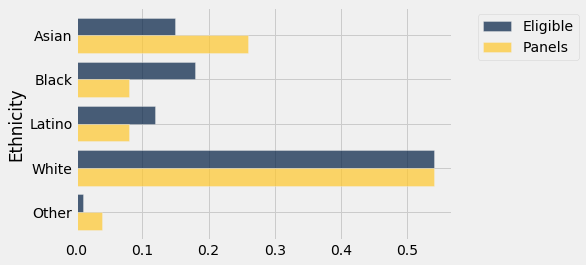

In [16]:
jury.barh('Ethnicity')

In [17]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [18]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([0.15390021, 0.18200984, 0.10751933, 0.547435  , 0.00913563])

In [19]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.1539
Black,0.18,0.08,0.18201
Latino,0.12,0.08,0.107519
White,0.54,0.54,0.547435
Other,0.01,0.04,0.00913563


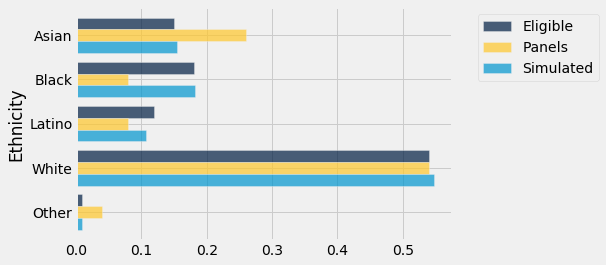

In [20]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [21]:
# In the last lecture, the difference between observed black/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance

In [22]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [58]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

In [57]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.01165846802529864

In [25]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


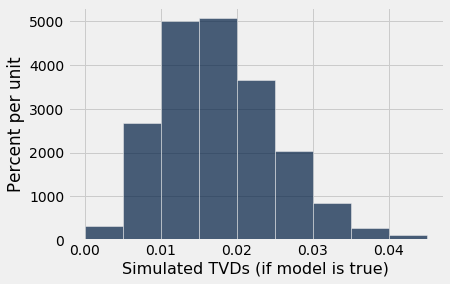

In [59]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))